### embedding

In [1]:
!pip install fair-esm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.2 MB/s 


In [2]:
import numpy as np
import torch
import esm
from esm import pretrained
import pandas as pd
import os
import collections


In [3]:
# dataset loading
dataset = pd.read_excel('umami_test.xlsx')
sequence_list = dataset['sequence']
data = []
for seq in sequence_list:
    new_seq = [seq,seq]
    fucking_tuple = tuple(new_seq)
    data.append(fucking_tuple)
print(data)

y_test = dataset['label']
y_test = np.array(y_test)

[('APKHKEMPFPKYPVEPF', 'APKHKEMPFPKYPVEPF'), ('IA', 'IA'), ('AL', 'AL'), ('GW', 'GW'), ('VEL', 'VEL'), ('RPPFIV', 'RPPFIV'), ('AGNPDIEHPE', 'AGNPDIEHPE'), ('AEA', 'AEA'), ('RR', 'RR'), ('PFPP', 'PFPP'), ('QNDKIHPFAQTQSLVYPFGPIPNSLPQNIPPLTQTPVVV', 'QNDKIHPFAQTQSLVYPFGPIPNSLPQNIPPLTQTPVVV'), ('FI', 'FI'), ('PFPIIV', 'PFPIIV'), ('DGG', 'DGG'), ('WWW', 'WWW'), ('EDG', 'EDG'), ('EGF', 'EGF'), ('DEL', 'DEL'), ('FYPE', 'FYPE'), ('DED', 'DED'), ('IN', 'IN'), ('RGPPFIVGG', 'RGPPFIVGG'), ('WP', 'WP'), ('FFGG', 'FFGG'), ('VG', 'VG'), ('DLL', 'DLL'), ('EED', 'EED'), ('RPGF', 'RPGF'), ('VPPFLQ', 'VPPFLQ'), ('GPPFIV', 'GPPFIV'), ('NENLL', 'NENLL'), ('VVV', 'VVV'), ('FFF', 'FFF'), ('II', 'II'), ('PAQ', 'PAQ'), ('EF', 'EF'), ('TAY', 'TAY'), ('RGPPGFG', 'RGPPGFG'), ('PFPGPIPNS', 'PFPGPIPNS'), ('GI', 'GI'), ('GD', 'GD'), ('LEQLL', 'LEQLL'), ('GMIYPG', 'GMIYPG'), ('FFPG', 'FFPG'), ('NALEPDHRVE', 'NALEPDHRVE'), ('GGLG', 'GGLG'), ('DL', 'DL'), ('GLGGG', 'GLGGG'), ('FYPELFR', 'FYPELFR'), ('ID', 'ID'), ('VII

In [ ]:
# load the model
model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# prepare the sequence  information into the list
batch_labels, batch_strs, batch_tokens = batch_converter(data) # convert the sequence as a batch
batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)
## batch tokens are the embedding results of the whole data set

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)  # here we must use the last layer for the embeddings export
token_representations = results["representations"][6]
print(token_representations.shape)

# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, tokens_len in enumerate(batch_lens):
    sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0))
print(sequence_representations)

# save dataset
sequence_representations # is a list and each element is a tensor
X = collections.defaultdict(list)
for i in range(len(sequence_representations)):
    # tensor can be transformed as numpy sequence_representations[0].numpy() or sequence_representations[0].to_list
    each_seq_rep = sequence_representations[i].tolist()
    for each_element in each_seq_rep:
        X[i].append(each_element)

X = pd.DataFrame(X).T
X.to_csv('umami_test_esm2_t6_8M_UR50D_unified_320_dimension.csv')


In [5]:
# dataset loading
dataset = pd.read_excel('umami_train.xlsx')
sequence_list = dataset['sequence']
data = []
for seq in sequence_list:
    new_seq = [seq,seq]
    fucking_tuple = tuple(new_seq)
    data.append(fucking_tuple)
print(data)

y_train = dataset['label']
y_train = np.array(y_train)

[('VVYPWTQRF', 'VVYPWTQRF'), ('LDL', 'LDL'), ('KLHENIAR', 'KLHENIAR'), ('RGPFIV', 'RGPFIV'), ('QEEL', 'QEEL'), ('NALPE', 'NALPE'), ('KF', 'KF'), ('VDR', 'VDR'), ('RGPFPIIV', 'RGPFPIIV'), ('VVGET', 'VVGET'), ('ET', 'ET'), ('IF', 'IF'), ('LL', 'LL'), ('CCNKSV', 'CCNKSV'), ('PVARMCR', 'PVARMCR'), ('DA', 'DA'), ('GR', 'GR'), ('VV', 'VV'), ('IK', 'IK'), ('YQQPVLGPVRGPFPI', 'YQQPVLGPVRGPFPI'), ('AYFYPEL', 'AYFYPEL'), ('GDG', 'GDG'), ('DDD', 'DDD'), ('AE', 'AE'), ('GNPDIEHP', 'GNPDIEHP'), ('EQPQQNE', 'EQPQQNE'), ('RGPPGGGFF', 'RGPPGGGFF'), ('YP', 'YP'), ('FALPQYLK', 'FALPQYLK'), ('VPLGTQYTDAPSF', 'VPLGTQYTDAPSF'), ('GGRGPPFIVGG', 'GGRGPPFIVGG'), ('AHSVRFY', 'AHSVRFY'), ('ANPGPVRDLR', 'ANPGPVRDLR'), ('PVLGPVRGPFPIIV', 'PVLGPVRGPFPIIV'), ('GLG', 'GLG'), ('RPFF', 'RPFF'), ('VYPFPPGI', 'VYPFPPGI'), ('NGKET', 'NGKET'), ('RGPPFF', 'RGPPFF'), ('GGFF', 'GGFF'), ('FFPR', 'FFPR'), ('QVAIAHRDAK', 'QVAIAHRDAK'), ('EK', 'EK'), ('PE', 'PE'), ('RKE', 'RKE'), ('EQQQQ', 'EQQQQ'), ('FPK', 'FPK'), ('DG', 'DG'),

In [ ]:
# load the model
model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# prepare the sequence  information into the list
batch_labels, batch_strs, batch_tokens = batch_converter(data) # convert the sequence as a batch
batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)
## batch tokens are the embedding results of the whole data set

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)  # here we must use the last layer for the embeddings export
token_representations = results["representations"][6]
print(token_representations.shape)

# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, tokens_len in enumerate(batch_lens):
    sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0))
print(sequence_representations)

# save dataset
sequence_representations # is a list and each element is a tensor
X = collections.defaultdict(list)
for i in range(len(sequence_representations)):
    # tensor can be transformed as numpy sequence_representations[0].numpy() or sequence_representations[0].to_list
    each_seq_rep = sequence_representations[i].tolist()
    for each_element in each_seq_rep:
        X[i].append(each_element)

X = pd.DataFrame(X).T
X.to_csv('umami_train_esm2_t6_8M_UR50D_unified_320_dimension.csv')


# build model

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
# read embeded files
X_train_data_name = 'umami_train_esm2_t6_8M_UR50D_unified_320_dimension.csv'
X_train_data = pd.read_csv(X_train_data_name,header=0, index_col = 0,delimiter=',')

X_test_data_name = 'umami_test_esm2_t6_8M_UR50D_unified_320_dimension.csv'
X_test_data = pd.read_csv(X_test_data_name,header=0, index_col = 0,delimiter=',')

X_train = np.array(X_train_data)
X_test = np.array(X_test_data)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # normalize X to 0-1 range 
X_test = scaler.transform(X_test)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 320)
(89, 320)
(353,)
(89,)


# AnOxPePred architecture for one-hot

In [10]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,Conv1D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, AveragePooling1D, MaxPooling1D
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

# loop test for best performance

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_valid,y_train,y_valid = train_test_split(X_train, y_train,  test_size = 0.2, shuffle= True, stratify=y, \n",
#        "                                                 random_state = 1)

In [ ]:
filter_1 = 
filter_2 = 
kernel_size_1 = 
stride = 


In [11]:
inputShape=(320,1)
input = Input(inputShape)
x = Conv1D(128,(2),strides = (1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D((2), name='MaxPool1',padding="same")(x)
x = Dropout(0.15)(x)
x = Conv1D(32,(2),strides = (1),name='layer_conv2',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D((2), name='MaxPool2',padding="same")(x)
x = Dropout(0.15)(x)
x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.15)(x)
x = Dense(2,activation = 'softmax',name='fc2')(x)
model = Model(inputs = input,outputs = x,name='Predict')
# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False)
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
import math
def step_decay(epoch):
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,
           math.floor((1+epoch)/epochs_drop))
    return lrate
lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

history=model.fit(X_train, y_train, validation_data=(X_test, y_test),
                          epochs=100,callbacks=callbacks_list,batch_size = 8, verbose=1)

In [ ]:
model.summary() # show the model structure 

In [ ]:
# confusion matrix 
predicted_class= []
predicted_protability = model.predict(X_test,batch_size=1)
for i in range(predicted_protability.shape[0]):
  index = np.where(predicted_protability[i] == np.amax(predicted_protability[i]))[0][0]
  predicted_class.append(index)
predicted_class = np.array(predicted_class)      

y_true = y_test
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_class)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
predicted_protability = model.predict(X_test,batch_size=1)

In [ ]:
predicted_protability[1]

array([0.677774  , 0.32222596], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.6494


[0.6964783668518066, 0.6494464874267578]

In [ ]:
np.amax(predicted_protability[1], axis=None)

0.677774

# graph drawing

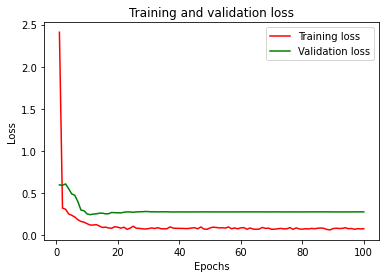

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

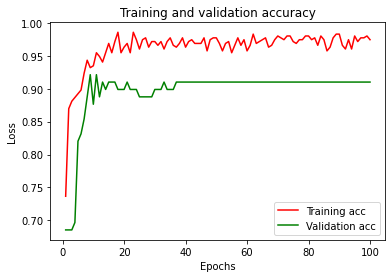

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print("on valid data")
pred1=model.evaluate(X_valid,Y_valid)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1